In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

#  Assignment 1 - Advance Machine Learning 159.738 

---

### Team members:
Ziyi Wang ID 18042783
Youzhi Lei   19039281

## Content
* Loading datasets and resize data split to training and testing
* For this part, we will use the CNN for the dog&cat dataset


---


#### Information about datasets
#### Labeled dogs and cats from Microsoft
* Dogs and Cats image https://www.microsoft.com/en-us/download/details.aspx?id=54765

In [2]:
#!pip install opencv-python

In [3]:
#!pip install tensorflow

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import patsy
import os
#from plt import Image 
import cv2
%matplotlib inline

In [12]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.13.1


In [63]:
from pylab import rcParams

sns.set(style="ticks")
#sns.set_style("whitegrid")
rcParams['figure.dpi'] = 72
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['patch.edgecolor'] = 'white'
rcParams['font.family'] = 'StixGeneral'
rcParams['figure.figsize'] = 10,8
rcParams['font.size'] = 14
rcParams['axes.labelsize'] = 'large'
rcParams['xtick.labelsize'] = 14
rcParams['ytick.labelsize'] = 14

pd.options.display.max_columns = 50

In [14]:
import os
cwd = os.getcwd()
print(cwd)
#Please put the data to current location, Thanks 

/home/zoe/Documents/machinelearning2019/dogcat


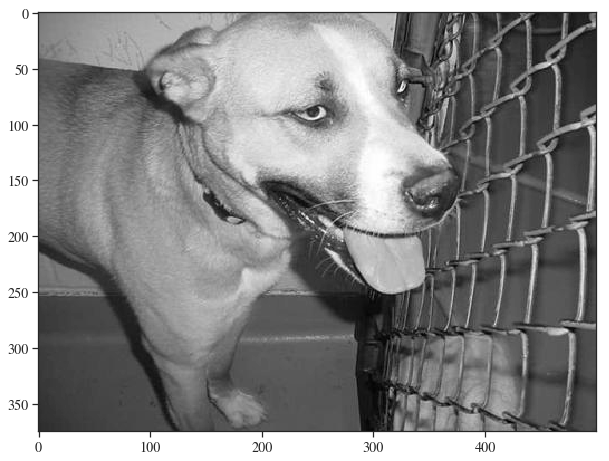

In [64]:
#load the dataset 
#test one image and show 
DATADIR = "/home/zoe/Documents/machinelearning2019/PetImages"
CATEGORIES = ["Dog","Cat"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)#path to cats or dogs dir
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)#read and make it to grey scale
        plt.imshow(img_array,cmap="gray")
        plt.show()
        break
    break
        

In [22]:
#show the print array
print(img_array)

[[119 119 120 ... 121 119 114]
 [119 119 120 ... 127 128 125]
 [120 120 121 ... 123 120 113]
 ...
 [ 43  44  45 ...  74  73  71]
 [ 43  44  45 ...  72  70  68]
 [ 43  44  45 ...  72  70  68]]


<function matplotlib.pyplot.show(*args, **kw)>

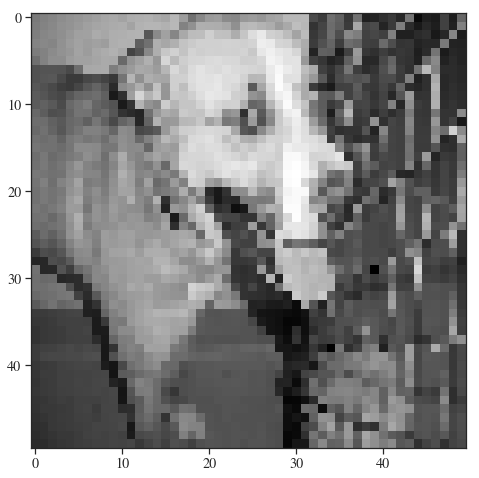

In [65]:
# set the image size to 50
IMG_SIZE = 50
new_array = cv2.resize(img_array,(IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = 'gray')
plt.show

In [24]:
import random
# seperate the dataset to training set and testing set 

training_data = []
testing_data = []


def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        #conver the dog and cat to numerical value 0/1
        class_num = CATEGORIES.index(category)
        
        for img in os.listdir(path):
            try:
                #read and make it to grey scale
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                #resize operation
                new_array = cv2.resize(img_array,(IMG_SIZE, IMG_SIZE))
                #small image and classfication name to training data
                randvalue =  random.randint(1, 2)
                if(randvalue == 1) :
                    training_data.append([new_array, class_num])
                else: 
                    testing_data.append([new_array, class_num])              
                
            except Exception as e:
                pass#pass the image if they broken
            
create_training_data()

In [25]:
# get out and show the training data and testing data
print(len(training_data))
print(len(testing_data))


12397
12549


In [26]:
#seperate dataset
random.shuffle(training_data)
random.shuffle(testing_data)

In [27]:
for sample in training_data[:10]:
    print(sample[1])

1
0
0
1
0
1
1
0
0
0


In [28]:
#featurs set
trainfeaturex = []
#label
trainlabely = []
#featurs set
testfeaturex = []
#label
testlabely = []

In [29]:
for features, label in training_data:
    trainfeaturex.append(features)
    trainlabely.append(label)
#conver numpy array in CNN network, -1 means how many featurs do we have and 1 means grey image
trainfeaturex = np.array(trainfeaturex).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [30]:
for features, label in testing_data:
    testfeaturex.append(features)
    testlabely.append(label)
#conver numpy array in CNN network, -1 means how many featurs do we have and 1 means grey image
testfeaturex = np.array(testfeaturex).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [31]:
import pickle

pickle_out = open("trainfeaturex.pickle", "wb")
pickle.dump(trainfeaturex, pickle_out)
pickle_out.close()

pickle_out = open("trainlabely.pickle", "wb")
pickle.dump(trainlabely, pickle_out)
pickle_out.close()

pickle_in = open("trainfeaturex.pickle", "rb")
trainfeaturex = pickle.load(pickle_in)

In [32]:
#pickle for testr 
pickle_out = open("testfeaturex.pickle", "wb")
pickle.dump(testfeaturex, pickle_out)
pickle_out.close()

pickle_out = open("testlabely.pickle", "wb")
pickle.dump(testlabely, pickle_out)
pickle_out.close()

#test 
pickle_in = open("testfeaturex.pickle", "rb")
testfeaturex = pickle.load(pickle_in)

In [33]:
trainfeaturex[1]

array([[[129],
        [116],
        [107],
        ...,
        [200],
        [179],
        [155]],

       [[125],
        [128],
        [132],
        ...,
        [173],
        [182],
        [178]],

       [[172],
        [175],
        [181],
        ...,
        [189],
        [194],
        [192]],

       ...,

       [[220],
        [108],
        [115],
        ...,
        [158],
        [152],
        [194]],

       [[251],
        [198],
        [147],
        ...,
        [158],
        [135],
        [172]],

       [[248],
        [243],
        [ 72],
        ...,
        [129],
        [127],
        [ 77]]], dtype=uint8)

In [34]:
trainfeaturex = trainfeaturex/255
trainfeaturex.shape

(12397, 50, 50, 1)

In [35]:
testfeaturex1 = testfeaturex/255
testfeaturex.shape

(12549, 50, 50, 1)

after above one can do CNN model training

### CNN Network

In [36]:
from keras.models import Sequential
from keras.layers import Input, Conv2D, BatchNormalization, Activation, MaxPool2D, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same', input_shape = trainfeaturex.shape[1:]))
# batchnormalization
# model.add(BatchNormalization(axis=bn_axis, name='bn_conv1'))

model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))


model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(len(CATEGORIES), activation='softmax'))



Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Using TensorFlow backend.


In [51]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [60]:
history = model.fit(trainfeaturex, trainlabely, epochs=10, validation_split=0.33, batch_size=10, verbose=0)

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


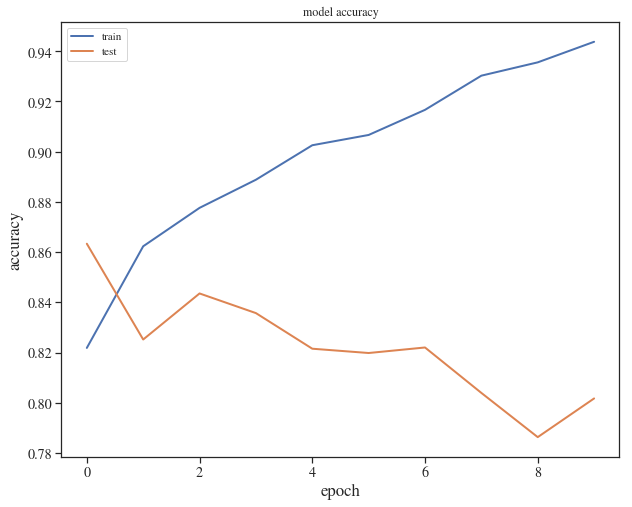

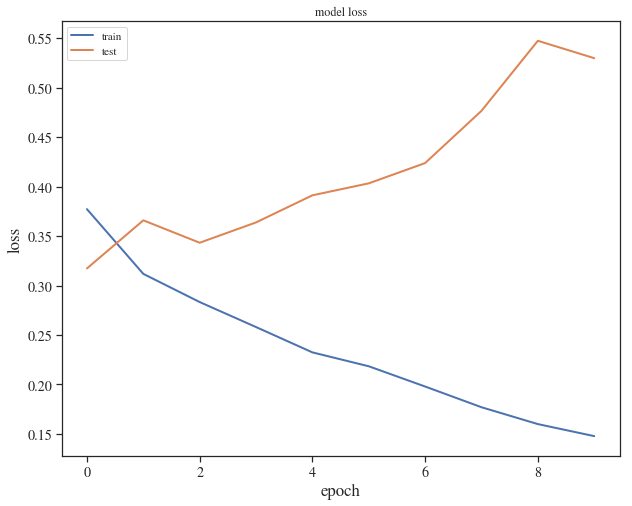

In [66]:
# Visualize training history
from keras.models import Sequential
from keras.layers import Dense
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [62]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 50, 50, 64)        640       
_________________________________________________________________
activation_1 (Activation)    (None, 50, 50, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
activation_2 (Activation)    (None, 25, 25, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 10816)             0         
__________

In [41]:
test_loss, test_acc = model.evaluate(testfeaturex1, testlabely)

print('Test accuracy:', test_acc)

12549/12549 [==============================] - 15s 1ms/step
Test accuracy: 0.7311339549063041


In [42]:
predictions = model.predict(testfeaturex1)

In [43]:
predictions[100]

array([0.6364585 , 0.36354148], dtype=float32)